### Class 7- Starter code


## Demo: Residual Error (15 mins)

P Values: [  9.15540205e-26]
Coefficients: [ 0.00096395]
y-intercept: 0.0859173102936
R-Squared: 0.871949198087
Mean squared error: 0.119901525171


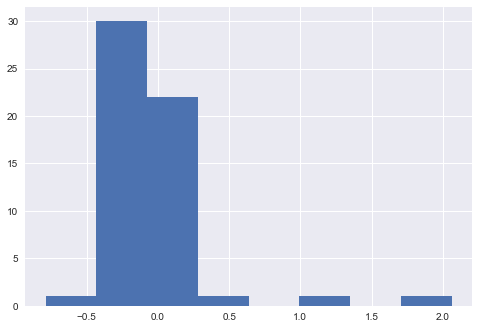

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn import linear_model, metrics

# read in the mammal dataset
wd = '../dataset/msleep/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    print 'Mean squared error:', metrics.mean_squared_error(y, algo.predict(X))
    
# metrics is the module you are using. mean_squared_error is the calculation you use
    
    plt.figure()
    plt.hist(residuals, bins=int(np.ceil(np.sqrt(len(y)))))
    
    # keep the model
    return algo


X = mammals[['bodywt']]
y = mammals['brainwt']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)


## Cross validation
#### Intro to cross validation with bike share data from last time. We will be modeling casual ridership. 

In [10]:
from sklearn import cross_validation
wd = '../dataset/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')

####Create dummy variables and set outcome (dependent) variable

In [11]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')  # alternative short-cut way!
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual 

# Combining dataframes using join function

#### Create a cross valiation with 5 folds

In [12]:
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)

In [9]:
kf.idxs

array([ 8990,  8451, 12807, ...,  5231,  9822, 11462])

In [13]:
mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    print "train indices", train_index
    print "test indices", test_index
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]
    


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
train indices [    0     1     2 ..., 17374 17375 17377]
test indices [    6     8    12 ..., 17368 17376 17378]
Model 1
MSE: 1652.86738272
R2: 0.311913321531
train indices [    1     2     3 ..., 17375 17376 17378]
test indices [    0     5    10 ..., 17344 17374 17377]
Model 2
MSE: 1584.55022263
R2: 0.311914368973
train indices [    0     2     4 ..., 17376 17377 17378]
test indices [    1     3     9 ..., 17372 17373 17375]
Model 3
MSE: 1550.99244223
R2: 0.31188696563
train indices [    0     1     3 ..., 17376 17377 17378]
test indices [    2     7    21 ..., 17369 17370 17371]
Model 4
MSE: 1774.56850375
R2: 0.311893327075
train indices [    0     1     2 ..., 17376 17377 17378]
test indices [    4    22    25 ..., 17362 17365 17367]
Model 5
MSE: 1803.54239047
R2: 0.311901478485
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1673.30418836
Mean of R2 for all folds: 0.311901892339


In [14]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'R2: ', lm.score(modeldata, y)

~~~~ Single Model ~~~~
MSE of single model: 1672.58110765
R2:  0.311934605989


In [15]:
# This is extra code to answer the question in the PDF of lesson 7 doing 2 to 50 k fold ....

kfolds = range(2,51,2)
mean_mse = []
mean_r2 = []
for each_fold in kfolds:
    kf = cross_validation.KFold(len(modeldata), n_folds=each_fold, shuffle=True)
    mse_values = []
    scores = []
    n= 0
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
        scores.append(lm.score(modeldata, y))
        n+=1
    
    mean_mse.append(np.mean(mse_values))
    mean_r2.append(np.mean(scores))

print mean_mse
print mean_r2

[1674.7534994810815, 1673.4916966346821, 1673.6477538986728, 1673.5724312049856, 1673.2769816531545, 1673.502844250319, 1673.9886974595968, 1673.4820641904521, 1673.8098038368475, 1673.6076096674365, 1673.3981345648515, 1673.3055493155568, 1673.3659378752104, 1673.3016961980427, 1673.6089761165542, 1673.7426061021606, 1673.5192091303427, 1673.5124184955173, 1673.4461744521461, 1673.5736511655668, 1673.3799065638752, 1673.388256020248, 1673.5269129362914, 1673.3776268097429, 1673.3834043564407]
[0.31163636057250438, 0.31188117302740392, 0.31189486476612194, 0.31190718124035288, 0.31191953065189476, 0.31191812431692417, 0.31191289323631405, 0.31192294479258909, 0.31192031726689684, 0.31192391889666915, 0.31192662684761208, 0.31192829248984105, 0.31192812829815908, 0.31192902924678695, 0.31192791834062877, 0.31192709688858927, 0.3119288432643586, 0.31192911799005957, 0.31192988233300573, 0.31193008380776543, 0.31193076162628386, 0.31193080482008734, 0.31192997243963222, 0.3119310516071930

### Check
While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?


Answer: 

### There are ways to improve our model with regularization. 
Let's check out the effects on MSE and R2

In [16]:
lm = linear_model.LinearRegression()
lm.fit(modeldata, y)

# could also be on smae line as illustrate below
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'OLS R2:', lm.score(modeldata, y)

lm = linear_model.Lasso().fit(modeldata, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Lasso R2:', lm.score(modeldata, y)
# lasso throws away variables which makes the model worse (as results show) since the 
# model is already very simple

lm = linear_model.Ridge().fit(modeldata, y)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Ridge R2:', lm.score(modeldata, y)
print lm.coef_
# even ridge is slightly worse than regular OLS model. 

~~~ OLS ~~~
OLS MSE:  1672.58110765
OLS R2: 0.311934605989
~~~ Lasso ~~~
Lasso MSE:  1725.41581608
Lasso R2: 0.290199495922
~~~ Ridge ~~~
Ridge MSE:  1672.60490113
Ridge R2: 0.311924817843
[ 112.50129738  -83.84805622  -13.38214934   -9.72671278  -10.46162477]


### Figuring out the alphas can be done by "hand"

In [17]:
alphas = np.logspace(-10, 10, 21)
# creates 21 observations between large range of -10 to 10 both to power of 10
# a is the weight you give to the various variables and this for loop shows you
# what different manually set weights do for the accuracy of your model

for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Lasso(alpha=a)
    lm.fit(modeldata, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(modeldata))
    
    
# pick the alpha with lowest mean squared error. Do note that in the above example we 
# used the same data for training and testing (modedata) which is obviously not good. WE
# should have used a different data set for training than for testing

Alpha: 1e-10
[ 112.67353849  -83.99400867  -14.13184385  -10.45474561  -11.1736308 ]
1672.60030785
Alpha: 1e-09


/Applications/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[ 112.67353845  -83.99400863  -14.13183603  -10.45473779  -11.17362296]
1672.60030788
Alpha: 1e-08
[ 112.67353812  -83.99400832  -14.13175774  -10.45465952  -11.17354466]
1672.60030816
Alpha: 1e-07
[ 112.67353477  -83.99400521  -14.13097487  -10.4538768   -11.17276161]
1672.60031101
Alpha: 1e-06
[ 112.67350128  -83.99397405  -14.12314614  -10.4460497   -11.16493108]
1672.60033951
Alpha: 1e-05
[ 112.67316634  -83.9936625   -14.04485887  -10.36777861  -11.08662579]
1672.60062569
Alpha: 0.0001
[ 112.66981758  -83.99054765  -13.26239352   -9.58547483  -10.30397994]
1672.60360255
Alpha: 0.001
[ 112.63635975  -83.9594323    -5.45806601   -1.78275411   -2.49783247]
1672.64489673
Alpha: 0.01
[ 112.39077334  -83.66325507   -2.90812399    0.66752444   -0.        ]
1672.66932453
Alpha: 0.1
[ 109.93593998  -80.45002088   -1.82328187    0.77974702   -0.        ]
1673.39565389
Alpha: 1.0
[ 86.81079432 -55.76414394   0.          -0.          -0.        ]
1725.41581608
Alpha: 10.0
[ 0. -0.  0. -0. -0.

### Or we can use grid search to make this faster

In [18]:
from sklearn import grid_search

# call grid_search function cross validation (by default 3 fold cross validation 
# but you can also set k differently) to determine best value for hyper parameter by
# running model for various values of the hyper parameter

# so in this case you specify model as ridge regression and the grid function runs it for 
# different values of the "weights" and specifies which vlaue of weight is the best (in terms of
# minimal mean squared error)

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs.fit(modeldata, y)


/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/App

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/App

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [24]:
# now also make the intercept either true or false ...

from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas, 'fit_intercept':[True, False]},
    scoring='mean_squared_error')

gs.fit(modeldata, y)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/App

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/App

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/App

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

##### Best score 

In [25]:
print gs.best_score_ 

-1813.60700073


##### mean squared error here comes in negative, so let's make it positive.

In [26]:
print -gs.best_score_ 

1813.60700073


##### explains which grid_search setup worked best

In [27]:
print gs.best_estimator_ 

# when alpha = 10 is the best value for the hyper parameter and fit_intercept is false
# so this is how you need to set your hyper parameters for the best model

# next step is to create your production model

Ridge(alpha=10.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [29]:
production_model = linear_model.Ridge(alpha=10.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
production_model.fit(modeldata, y)

Ridge(alpha=10.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
production_model.coef_

# in all of the above I can also replace ridge by lasso
# note that R squared can only be used if there is an intercept

array([ 111.77826824,  -81.01023379,   29.87386401,   33.10029496,
         31.83025872])

##### shows all the grid pairings and their performances.

In [83]:
print gs.grid_scores_ 

# this gives you all the scores of the model for the different values of the hyper 
# parameter (the weights)


[mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-10}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1.0000000000000001e-09}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-07}, mean: -1817.58711, std: 542.14317, params: {'alpha': 1.0000000000000001e-05}, mean: -1817.58707, std: 542.14331, params: {'alpha': 0.0001}, mean: -1817.58663, std: 542.14477, params: {'alpha': 0.001}, mean: -1817.58230, std: 542.15933, params: {'alpha': 0.01}, mean: -1817.54318, std: 542.30102, params: {'alpha': 0.10000000000000001}, mean: -1817.20111, std: 543.63587, params: {'alpha': 1.0}, mean: -1814.09369, std: 556.35563, params: {'alpha': 10.0}, mean: -1818.51694, std: 653.68607, params: {'alpha': 100.0}, mean: -2125.58777, std: 872.45270, params: {'alpha': 1000.0}, mean: -2458.08836, std: 951.30428, params: {'alpha': 10000.0}, me

## Gradient Descent

In [2]:
import numpy as np

num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        n += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2 is better than 2.2
found better solution! using 1.2
0.2 is better than 1.2
found better solution! using 0.2
6.0 is closest to 6.2


### Bonus: 
implement a stopping point, similar to what n_iter would do in gradient descent when we've reached "good enough"

## Demo: Application of Gradient Descent 

In [32]:
lm = linear_model.SGDRegressor()
# this is initializing the model

lm.fit(modeldata, y)
print "Gradient Descent R2:", lm.score(modeldata, y)
print "Gradient Descent MSE:", metrics.mean_squared_error(y, lm.predict(modeldata))

Gradient Descent R2: 0.308425083458
Gradient Descent MSE: 1681.11221695


### Check: Untuned, how well did gradient descent perform compared to OLS?

Answer: not as good since it is an estimate of the OLS model. Note: if you look at the syntax you will see default parameter is l2
penalty = l2 is Ridge and l1 is Lasso

In [41]:
?linear_model.SGDRegressor()

# Independent Practice: Bike data revisited

There are tons of ways to approach a regression problem. The regularization techniques appended to ordinary least squares optimizes the size of coefficients to best account for error. Gradient Descent also introduces learning rate (how aggressively do we solve the problem), epsilon (at what point do we say the error margin is acceptable), and iterations (when should we stop no matter what?)

For this deliverable, our goals are to:

- implement the gradient descent approach to our bike-share modeling problem,
- show how gradient descent solves and optimizes the solution,
- demonstrate the grid_search module!

While exploring the Gradient Descent regressor object, you'll build a grid search using the stochastic gradient descent estimator for the bike-share data set. Continue with either the model you evaluated last class or the simpler one from today. In particular, be sure to implement the "param_grid" in the grid search to get answers for the following questions:

- With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
- Based on the data, we know when to properly use l1 vs l2 regularization. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true? If not, did gradient descent have enough iterations?
- How do these results change when you alter the learning rate (eta0)?

**Bonus**: Can you see the advantages and disadvantages of using gradient descent after finishing this exercise?

### Starter Code

In [39]:
params = {'alpha': np.logspace(-10, 10, 21)} 

# above put your gradient descent parameters here
# logspace is like range function; in this case you want 20 observations 
# between 10 ^ -10 and 10 ^ 10

gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1687.67939544
SGDRegressor(alpha=1.0000000000000001e-09, average=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', n_iter=5,
       penalty='l2', power_t=0.25, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
ALL ESTIMATORS
[mean: -1688.52971, std: 71.02948, params: {'alpha': 1e-10}, mean: -1687.67940, std: 71.10531, params: {'alpha': 1.0000000000000001e-09}, mean: -1692.02026, std: 67.75412, params: {'alpha': 1e-08}, mean: -1688.30106, std: 70.70829, params: {'alpha': 9.9999999999999995e-08}, mean: -1687.83615, std: 71.15464, params: {'alpha': 9.9999999999999995e-07}, mean: -1688.28706, std: 71.35360, params: {'alpha': 1.0000000000000001e-05}, mean: -1689.90012, std: 73.27674, params: {'alpha': 0.0001}, mean: -1692.01297, std: 72.68045, params: {'alpha': 0.001}, mean: -1732.51567, std: 71.88117, params: {'alpha': 0.01}, mean: -2053.15468, std: 83.65657, params: {'alpha': 0

In [43]:
np.logspace(-3, -0.301, 10)

array([ 0.001     ,  0.00199475,  0.00397904,  0.00793719,  0.01583272,
        0.03158235,  0.06299895,  0.12566728,  0.25067505,  0.50003453])

In [46]:
params = {'alpha': np.logspace(-10, 10, 21), 'penalty' : ['l1', 'l2', 'elasticnet'], 'eta0': np.logspace(-3, -0.301, 10)} 

# above put your gradient descent parameters here
# logspace is like range function; in this case you want 20 observations 
# between 10 ^ -10 and 10 ^ 10

gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1673.55181152
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1,
       eta0=0.031582350167557775, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', n_iter=5,
       penalty='l1', power_t=0.25, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
ALL ESTIMATORS
[mean: -2132.77036, std: 105.98119, params: {'penalty': 'l1', 'alpha': 1e-10, 'eta0': 0.001}, mean: -2132.77190, std: 105.66470, params: {'penalty': 'l2', 'alpha': 1e-10, 'eta0': 0.001}, mean: -2132.93208, std: 105.47079, params: {'penalty': 'elasticnet', 'alpha': 1e-10, 'eta0': 0.001}, mean: -1981.11130, std: 103.22978, params: {'penalty': 'l1', 'alpha': 1e-10, 'eta0': 0.001994751906790116}, mean: -1980.28027, std: 102.62200, params: {'penalty': 'l2', 'alpha': 1e-10, 'eta0': 0.001994751906790116}, mean: -1980.91113, std: 103.39013, params: {'penalty': 'elasticnet', 'alpha': 1e-10, 'eta0': 0.001994751906790116}, mean: -1815.06273, std: 98.02721, params: 